<a href="https://colab.research.google.com/github/JuneWayne/DS3021-KNN/blob/main/assignment/EthanCao_EDA_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
df = pd.read_csv('college_completion.csv')
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [4]:
# 2
print(df.shape)
print(df.columns)

(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

In [5]:
# 3
pd.crosstab(df['level'], df['control'])

control,Private for-profit,Private not-for-profit,Public
level,,,
2-year,465,68,926
4-year,527,1180,632


## I can see that there are significantly more private schools that are established with 4 year programs, both for-profit and non-profit. In comparison there are significantly more public schools established for 2 year programs, likely public community colleges built to educate disadvantaged people who couldn't receive proper middle/high school education growing up.

## At the same time, I also noticed that are significantly more private for profit schools established for 2 year programs compared to not for profit schools.

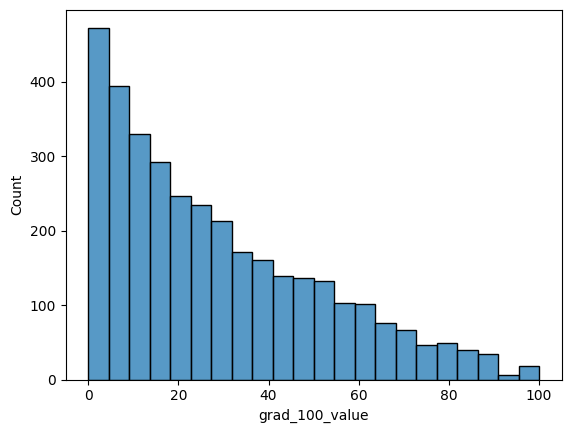

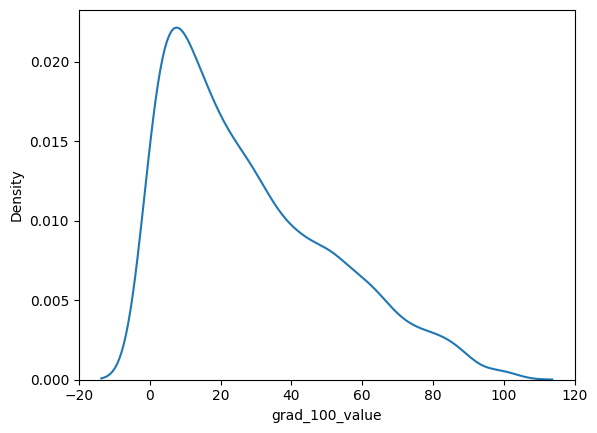

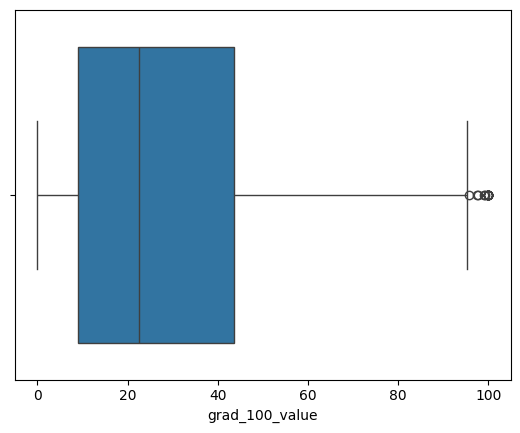

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [8]:
# 4
sns.histplot(df['grad_100_value'])
plt.show()
sns.kdeplot(df['grad_100_value'])
plt.show()
sns.boxplot(x=df['grad_100_value'])
plt.show()
df['grad_100_value'].describe()

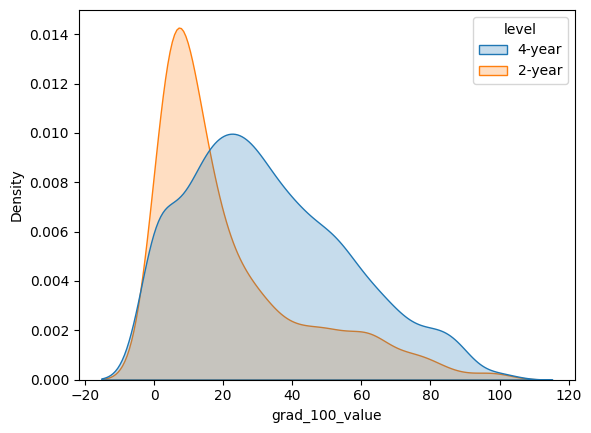

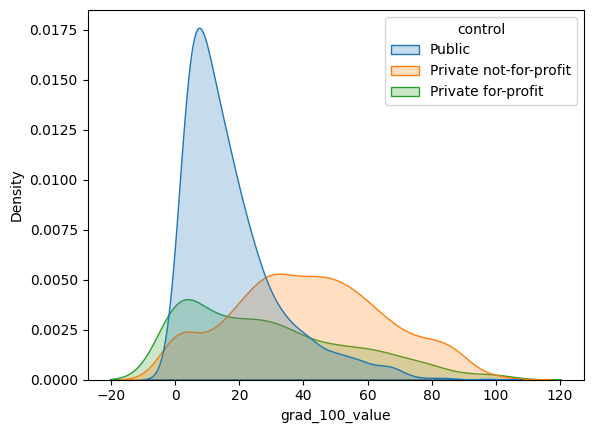

count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public                  21.8  33.800   86.3

In [13]:
# 5
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True)
plt.show()
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.show()
df.groupby(['level', 'control'])['grad_100_value'].describe()

## It appears that private not-for-profit schools tend to have better graduation rates with an average graduation rate of around 41% for both 2 years and 4 years colleges

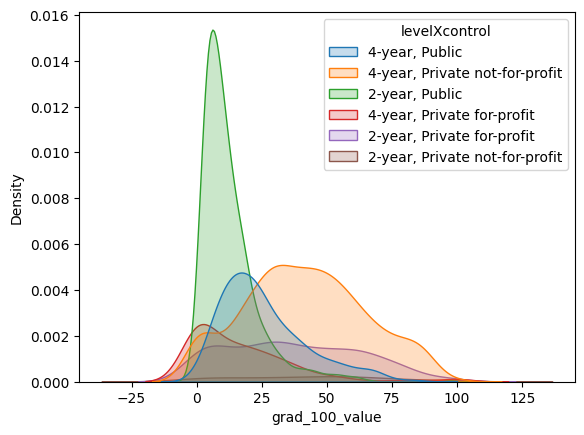

In [14]:
# 6
df['levelXcontrol'] = df['level'] + ', ' + df['control']
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.show()

## 4 year private not for profit colleges appear to have the best graduation rates as its peak is at the rightmost location of the kernel density plot

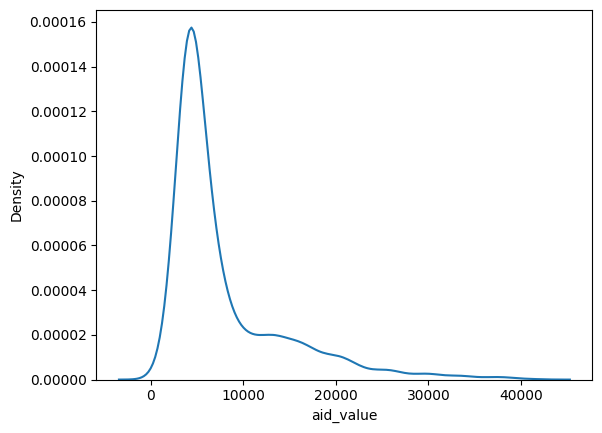

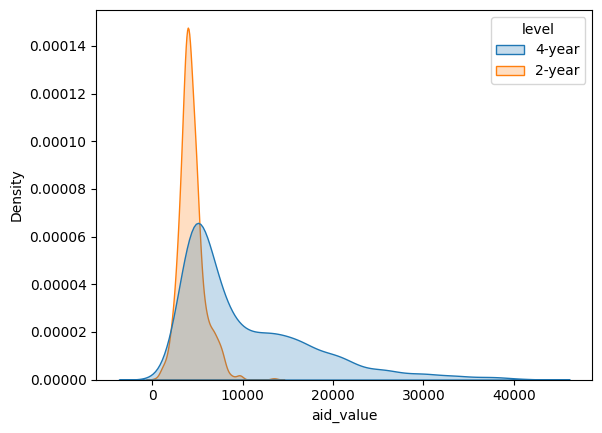

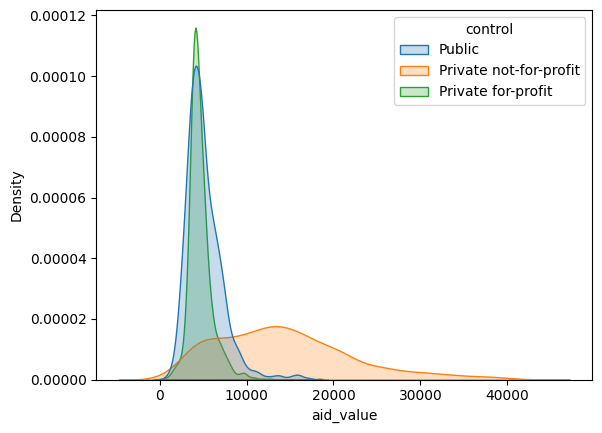

count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

In [19]:
# 7
sns.kdeplot(data=df, x='aid_value')
plt.show()
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True)
plt.show()
sns.kdeplot(data=df, x='aid_value', hue='control', fill=True)
plt.show()
df.groupby(['level', 'control'])['aid_value'].describe()


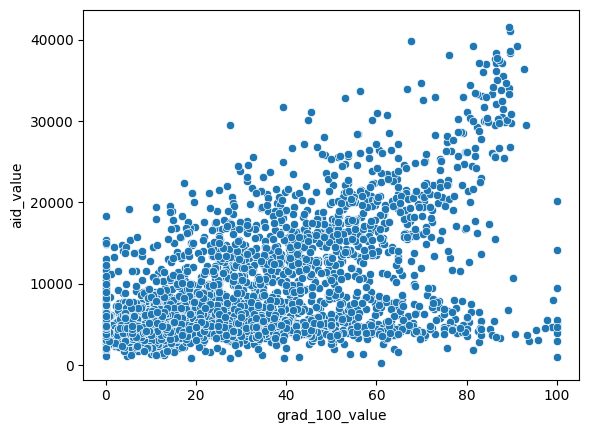

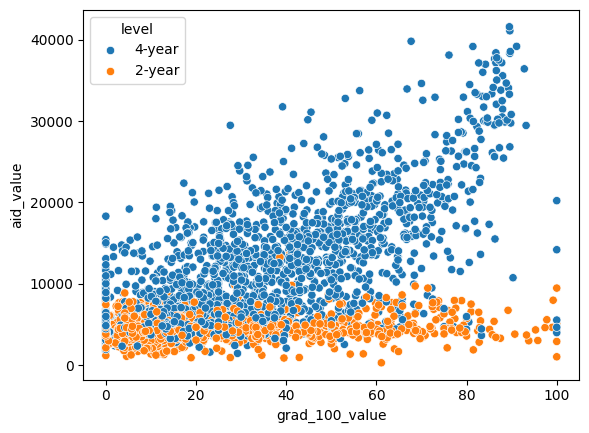

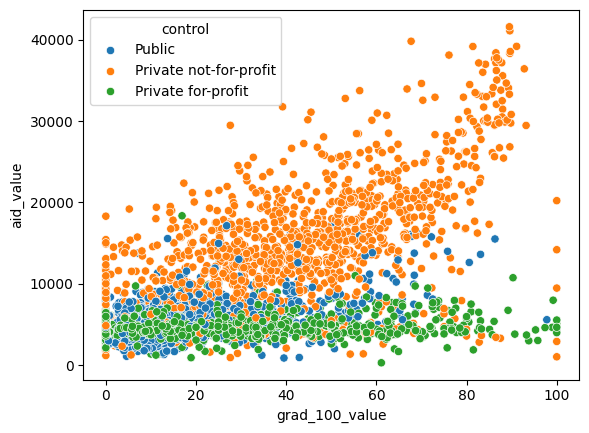

In [20]:
# 8
sns.scatterplot(data=df, x='grad_100_value', y='aid_value')
plt.show()
sns.scatterplot(data=df, x='grad_100_value', y='aid_value', hue='level')
plt.show()
sns.scatterplot(data=df, x='grad_100_value', y='aid_value', hue='control')
plt.show()


**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see?

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.